In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from apps.genetic_algorithms.genetic_program import FitnessFunction
from apps.genetic_algorithms.gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript

CONDENSED_COLS = ['individual_str', 'transaction_currency', 'counter_currency', 'profit_percent', 'benchmark_profit_percent']

%matplotlib inline
pd.set_option('display.max_columns', 500)

from apps.doge.doge_train_test import DogeTrainer
import time
end_timestamp = 1548806400 #int(time.time())  # UTC timestamp
start_timestamp = end_timestamp - 60*60*24
ticker = 'BTC_USDT'

e = DogeTrainer.run_training(start_timestamp, end_timestamp, ticker)
            


INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 57.22% out of 39.20G
INFO:root:>>>>>>> Starting GP training... 
INFO:root:    >>> start_time = 2019/01/29 00:05:00 UTC
INFO:root:    >>> end_time = 2019/01/30 00:05:00 UTC
INFO:root:Loaded 3 rockstars.
INFO:root: >>>>>>>> Building a data object for BTC_USDT...
CRITICAL:root:Encountered duplicate values in price data data, 314 values loaded, 282 remain after removal.
INFO:root:Retrieving values for rsi
INFO:root:Retrieving values for sma20
INFO:root:Retrieving values for sma50
INFO:root:Retrieving values for sma200
INFO:root:Retrieving values for ema20
INFO:root:Retrieving values for ema50
INFO:root:Retrieving values for ema200
INFO:root:Retrieving values for bb_up
INFO:root:Retrieving values for bb_mid
INFO:root:Retrieving values for bb_low
INFO:root:Retrieving value

### Looking at performance per training dataset and across all experiment variants
For each training dataset in the training collection, we get a performance dataframe sorted by profit. The dataframes and best individuals in them are shown below.

HoF::::::
    if_then_el 1.1476657168551425
    if_then_el 0.3036053677792411
    if_then_el 0.2633391545199368
    if_then_el 0.22049889214009014
    if_then_el 0.14864613056868023
    if_then_el 0.14699926142672676
    if_then_el 0.13441229665889692
    if_then_el 0.10595278771519404
    if_then_el 0.08960819777259794
    if_then_el 0.023049772083418536
GenBest::::::
    if_then_el 1.1476657168551425
    if_then_el 1.1476657168551425
    if_then_el 1.1476657168551425
    if_then_el 1.1476657168551425
    if_then_el 1.1476657168551425
HoF::::::
    if_then_el 1.1476657168551425
    if_then_el 0.32738176296240934
    if_then_el 0.2633391545199368
    if_then_el 0.15787060762471772
    if_then_el 0.14699926142672676
    if_then_el 0.13441229665889692
    if_then_el 0.08960819777259794
    if_then_el 0.07516303906205207
    if_then_el 0.07063519181012935
    if_then_el 0.045557622342995534
GenBest::::::
    if_then_el 1.1476657168551425
    if_then_el 1.1476657168551425
    if_then_el 1.

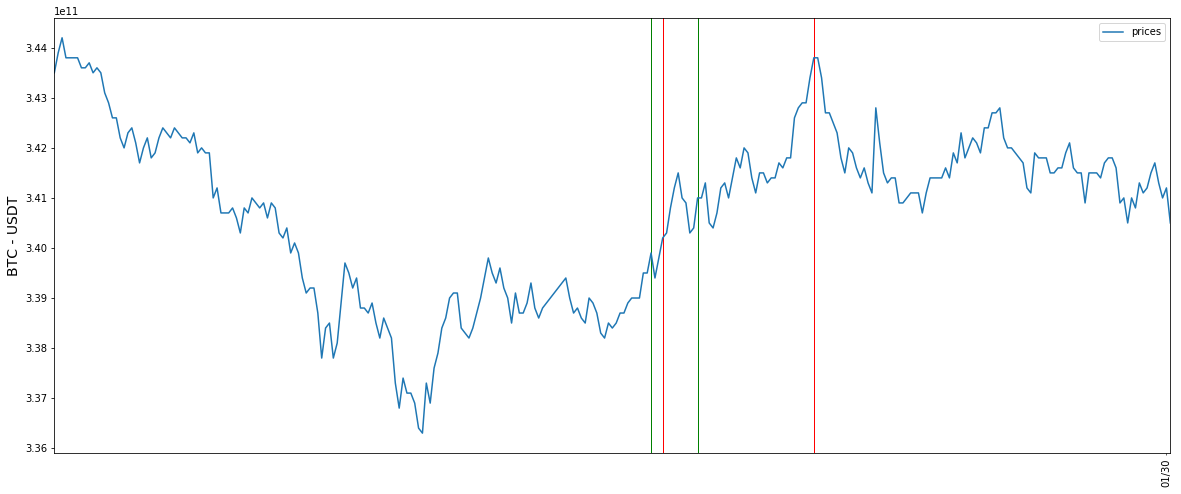

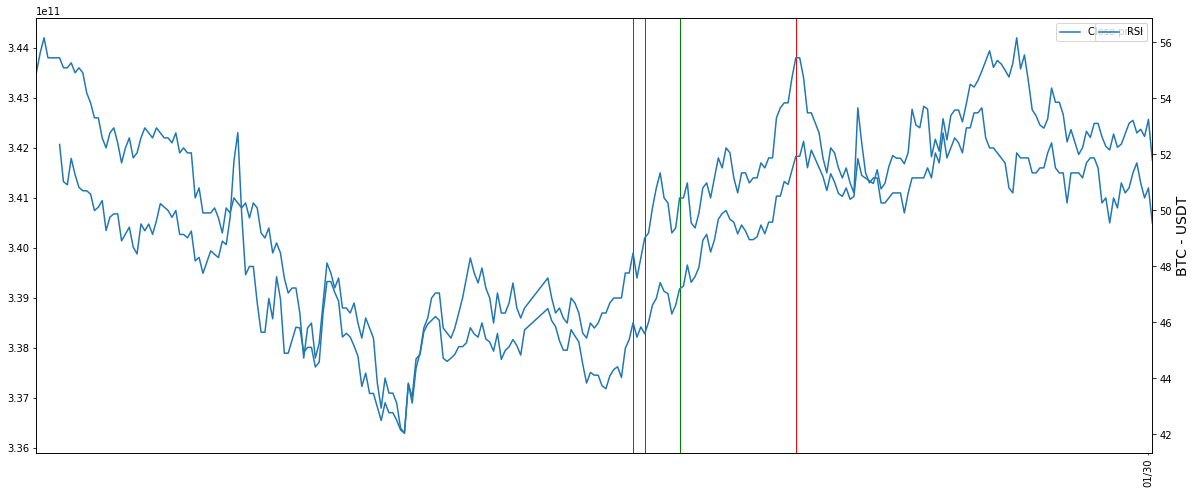

String representation:
if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))



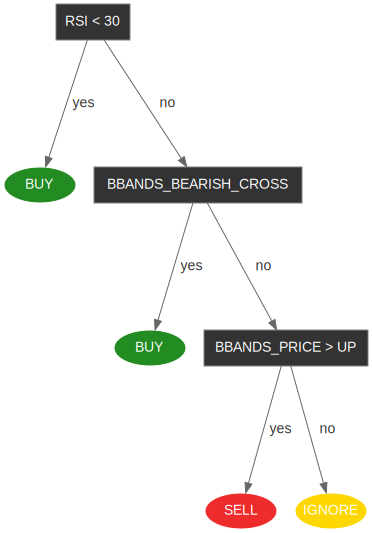

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/29 00:05:00 UTC
--
--
2019/01/29 12:55:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/29 12:55:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.93909973521624e-09
2019/01/29 13:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.88 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/29 13:10:00 UTC rsi_value=None
   cash: 998.8818481906442    crypto: 0.0
2019/01/29 13:55:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.88 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 341000000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-US

In [3]:
performance_dfs = e.get_joined_performance_dfs_over_all_variants()

In [4]:
len(e.training_data[0].indicators['rsi'])
#e.training_data[0].start_time
e.training_data[0].end_time

1548806700.0

We can explore each of the performance dataframes in more detail.

In [5]:
pd.set_option('display.max_colwidth', -1)
performance_dfs[0][CONDENSED_COLS]

,individual_str,transaction_currency,counter_currency,profit_percent,benchmark_profit_percent
0,"if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))",BTC,USDT,0.507065,-1.071517
0,"if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))",BTC,USDT,0.507065,-1.071517
6,"if_then_else(bbands_bearish_cross(ARG0), if_then_else(bbands_bullish_cross(ARG0), if_then_else(bbands_squeeze_bullish(ARG0), ignore, buy), if_then_else(candlestick_momentum_buy(ARG0), buy, sell)), if_then_else(rsi_gt_80(ARG0), sell, ignore))",BTC,USDT,-0.023730,-1.071517
2,"if_then_else(gt(ema200(ARG0), 0), if_then_else(bbands_squeeze_bearish(ARG0), sell, if_then_else(bbands_price_gt_up(ARG0), buy, ignore)), ignore)",BTC,USDT,-0.023730,-1.071517
6,"if_then_else(bbands_price_gt_up(ARG0), buy, ignore)",BTC,USDT,-0.023730,-1.071517
5,"if_then_else(bbands_bearish_cross(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, buy), ignore)",BTC,USDT,-0.023730,-1.071517
8,"if_then_else(bbands_bearish_cross(ARG0), buy, ignore)",BTC,USDT,-0.023730,-1.071517
2,"if_then_else(bbands_bullish_cross(ARG0), sell, if_then_else(bbands_squeeze_bullish(ARG0), buy, ignore))",BTC,USDT,-0.023730,-1.071517
7,"if_then_else(bbands_price_gt_up(ARG0), if_then_else(bbands_bearish_cross(ARG0), ignore, buy), ignore)",BTC,USDT,-0.111893,-1.071517
5,"if_then_else(lt(sma20(ARG0), sma200(ARG0)), if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_20(ARG0), buy, sell), sell), buy)",BTC,USDT,-0.112738,-1.071517


Experiment id: run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs



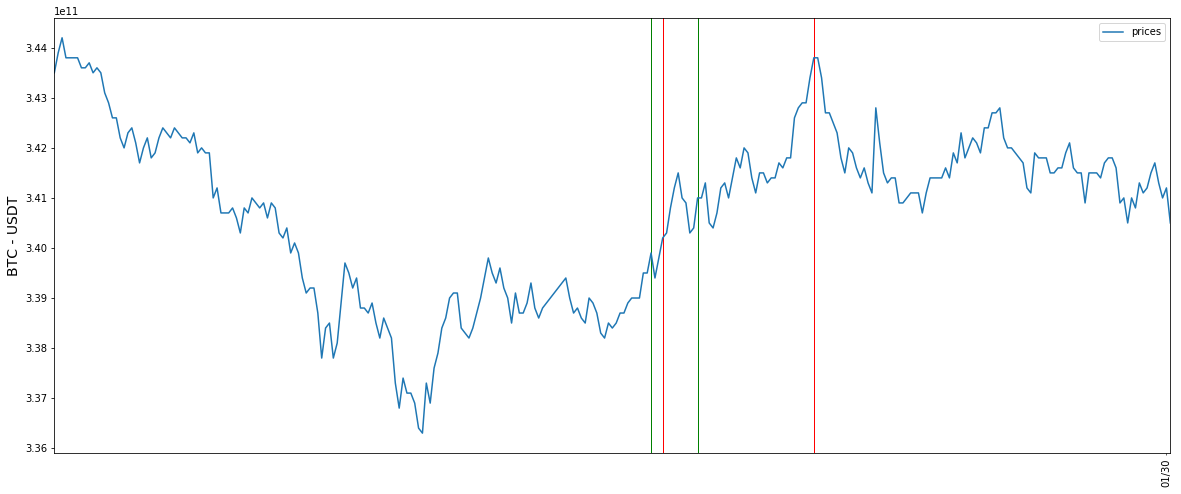

String representation:
if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))



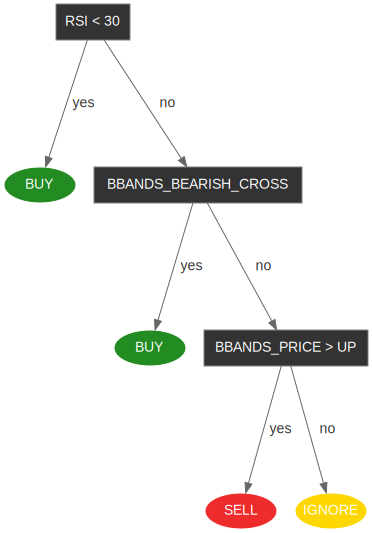

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/29 00:05:00 UTC
--
--
2019/01/29 12:55:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/29 12:55:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.93909973521624e-09
2019/01/29 13:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.88 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/29 13:10:00 UTC rsi_value=None
   cash: 998.8818481906442    crypto: 0.0
2019/01/29 13:55:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.88 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 341000000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-US

In [6]:
e.performance_df_row_info(performance_dfs[0].iloc[0])

### Best performing individuals across all variants and datasets
Each experiment variant will have a winner, the doge baby that had the best fitness value. We can get these winners by invoking the command below:

In [7]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_variants_and_datasets(e.training_data, sort_by=["fitness_value"], top_n_per_variant=20)

In [8]:
pd.set_option('display.max_colwidth', -1)
best_individuals_across_variants_and_datasets.drop(['individual','variant','evaluations'], axis=1)




,experiment_name,doge,fitness_function,fitness_value,mean_profit,std_profit,max_profit,min_profit,all_profits,benchmark_profits,differences
0,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs,"if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))",ff_benchmarkdiffabsv3,1.147666,0.507065,0.0,0.507065,0.507065,0.5070650043128921,-1.0715165938864628,1.578581598199355
13,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_1.0;n_500;gen_5;td_4;a;nrs,"if_then_else(rsi_lt_20(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))",ff_benchmarkdiffabsv3,1.147666,0.507065,0.0,0.507065,0.507065,0.5070650043128921,-1.0715165938864628,1.578581598199355
2,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs,"if_then_else(xor(bbands_price_gt_up(ARG0), rsi_lt_30(ARG0)), if_then_else(rsi_lt_30(ARG0), sell, if_then_else(bbands_bearish_cross(ARG0), buy, sell)), ignore)",ff_benchmarkdiffabsv3,1.147666,0.507065,0.0,0.507065,0.507065,0.5070650043128921,-1.0715165938864628,1.578581598199355
3,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs,"if_then_else(xor(bbands_price_gt_up(ARG0), rsi_lt_30(ARG0)), if_then_else(rsi_gt_70(ARG0), sell, if_then_else(bbands_bearish_cross(ARG0), buy, sell)), ignore)",ff_benchmarkdiffabsv3,1.147666,0.507065,0.0,0.507065,0.507065,0.5070650043128921,-1.0715165938864628,1.578581598199355
1,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs,"if_then_else(rsi_gt_80(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))",ff_benchmarkdiffabsv3,1.147666,0.507065,0.0,0.507065,0.507065,0.5070650043128921,-1.0715165938864628,1.578581598199355
14,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_1.0;n_500;gen_5;td_4;a;nrs,"if_then_else(bbands_bullish_cross(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))",ff_benchmarkdiffabsv3,0.327382,-0.309764,0.0,-0.309764,-0.309764,-0.30976358325317505,-1.0715165938864628,0.7617530106332877
4,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs,"if_then_else(bbands_bullish_cross(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(rsi_lt_25(ARG0), buy, sell), sell), if_then_else(rsi_gt_80(ARG0), if_then_else(bbands_bearish_cross(ARG0), ignore, sell), if_then_else(bbands_price_lt_low(ARG0), buy, ignore)))",ff_benchmarkdiffabsv3,0.303605,-0.474012,0.0,-0.474012,-0.474012,-0.47401158880074945,-1.0715165938864628,0.5975050050857134
5,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs,"if_then_else(gt(ema200(ARG0), 0), if_then_else(bbands_squeeze_bearish(ARG0), sell, if_then_else(bbands_price_gt_up(ARG0), buy, ignore)), ignore)",ff_benchmarkdiffabsv3,0.263339,-0.023730,0.0,-0.023730,-0.023730,-0.02373036187113939,-1.0715165938864628,1.0477862320153235
15,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_1.0;n_500;gen_5;td_4;a;nrs,"if_then_else(bbands_bullish_cross(ARG0), sell, if_then_else(bbands_squeeze_bullish(ARG0), buy, ignore))",ff_benchmarkdiffabsv3,0.263339,-0.023730,0.0,-0.023730,-0.023730,-0.02373036187113939,-1.0715165938864628,1.0477862320153235
6,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_benchmarkdiffabsv3;x_0.9;m_0.8;n_500;gen_5;td_4;a;nrs,"if_then_else(lt(ema50(ARG0), ema200(ARG0)), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(bbands_bearish_cross(ARG0), ignore, buy), sell), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_70(ARG0), sell, ignore), buy))",ff_benchmarkdiff

### How did this individual perform on training sets?

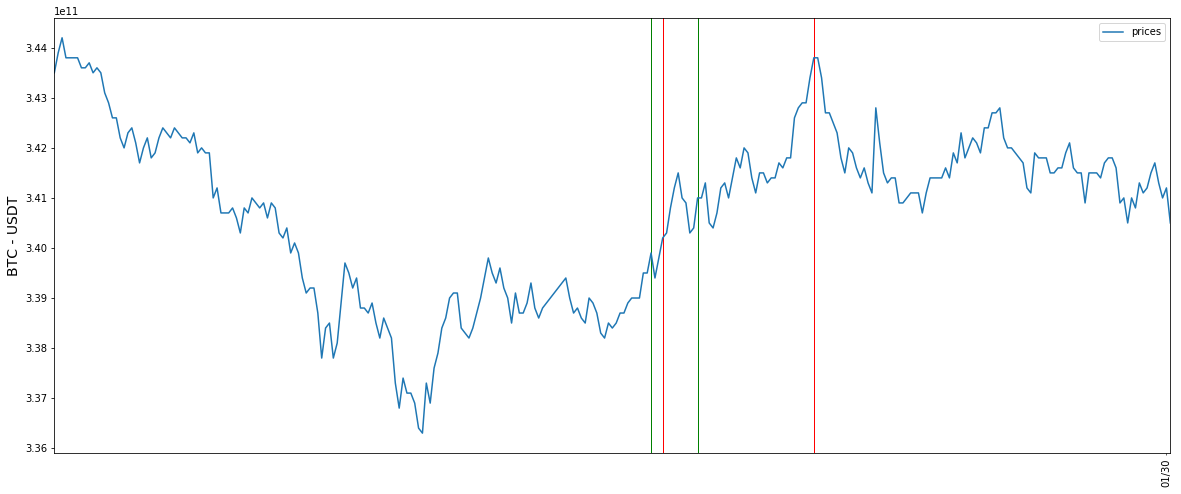

String representation:
if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))



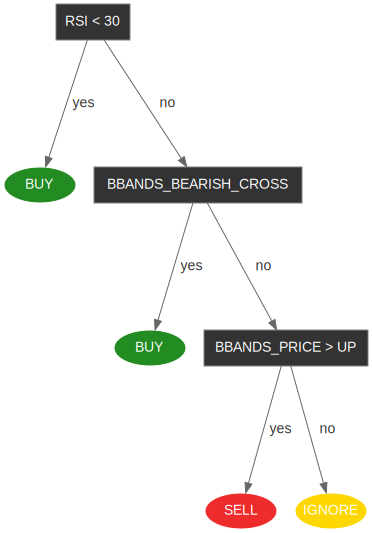

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/29 00:05:00 UTC
--
--
2019/01/29 12:55:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/29 12:55:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.93909973521624e-09
2019/01/29 13:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.88 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/29 13:10:00 UTC rsi_value=None
   cash: 998.8818481906442    crypto: 0.0
2019/01/29 13:55:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.88 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 341000000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-US

In [9]:
best_overall = best_individuals_across_variants_and_datasets.iloc[0]
evaluations = best_overall.evaluations
for evaluation in evaluations:
    e._print_individual_info(best_overall.individual, evaluation)

### Let's see its performance on the validation set...

In [10]:
filtered = best_individuals_across_variants_and_datasets
filtered = filtered[filtered.fitness_value > 0]

CRITICAL:root:Encountered duplicate values in price data data, 320 values loaded, 288 remain after removal.
INFO:root:_compute_ta_indicators took 2.0234 seconds
INFO:root:_build_buy_and_hold_benchmark took 0.0080 seconds
ERROR:root:Unable to retrieve indicator: 'the label [1548882000] is not in the [index]'
ERROR:root:Unable to retrieve indicator: 1548882000


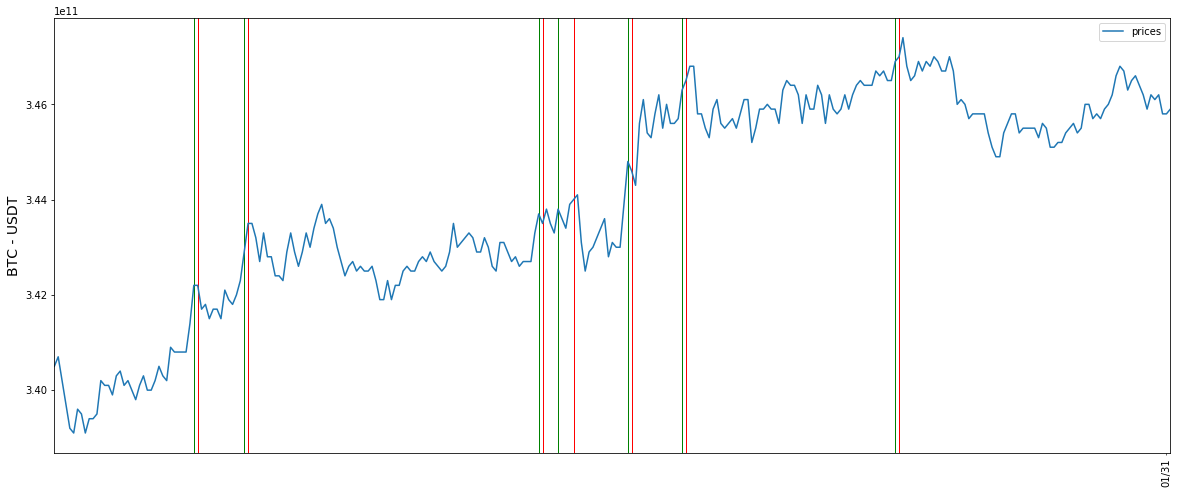

String representation:
if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))



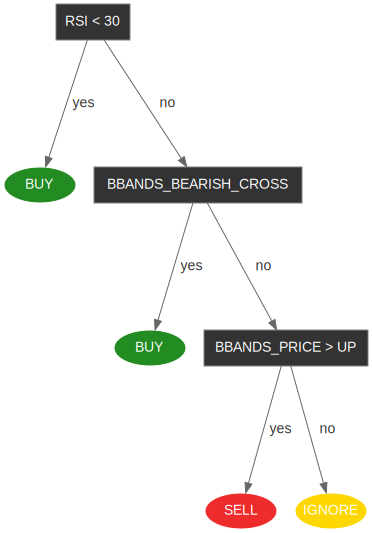

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

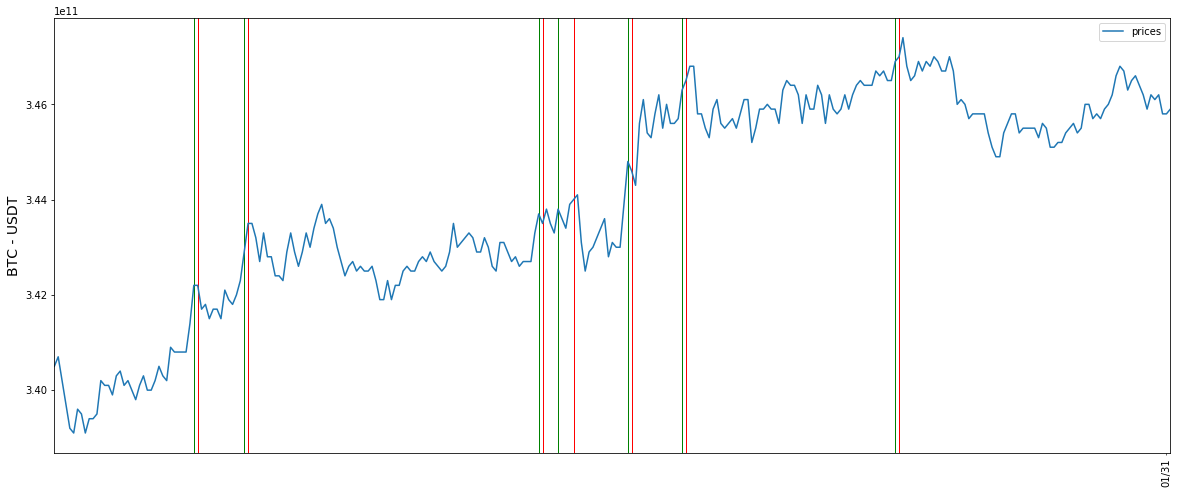

String representation:
if_then_else(rsi_lt_20(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))



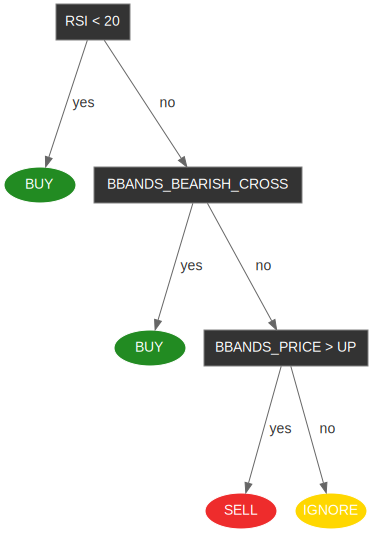

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

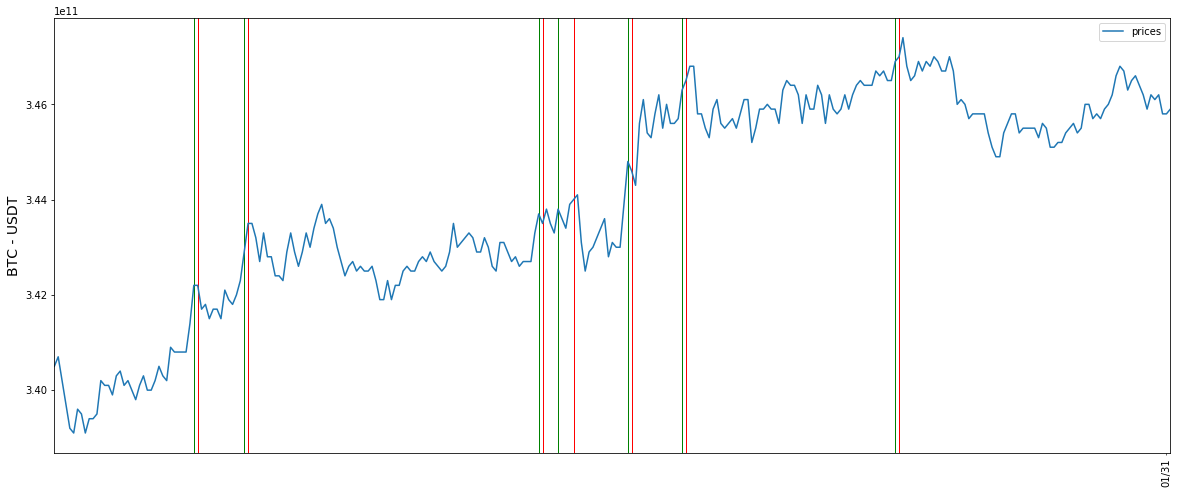

String representation:
if_then_else(xor(bbands_price_gt_up(ARG0), rsi_lt_30(ARG0)), if_then_else(rsi_lt_30(ARG0), sell, if_then_else(bbands_bearish_cross(ARG0), buy, sell)), ignore)



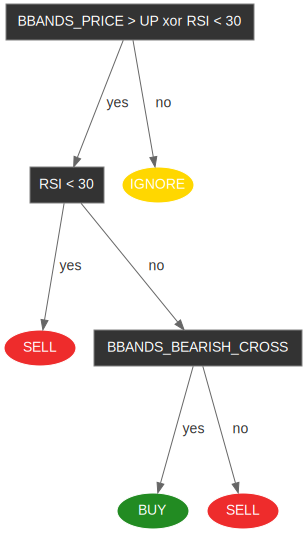

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

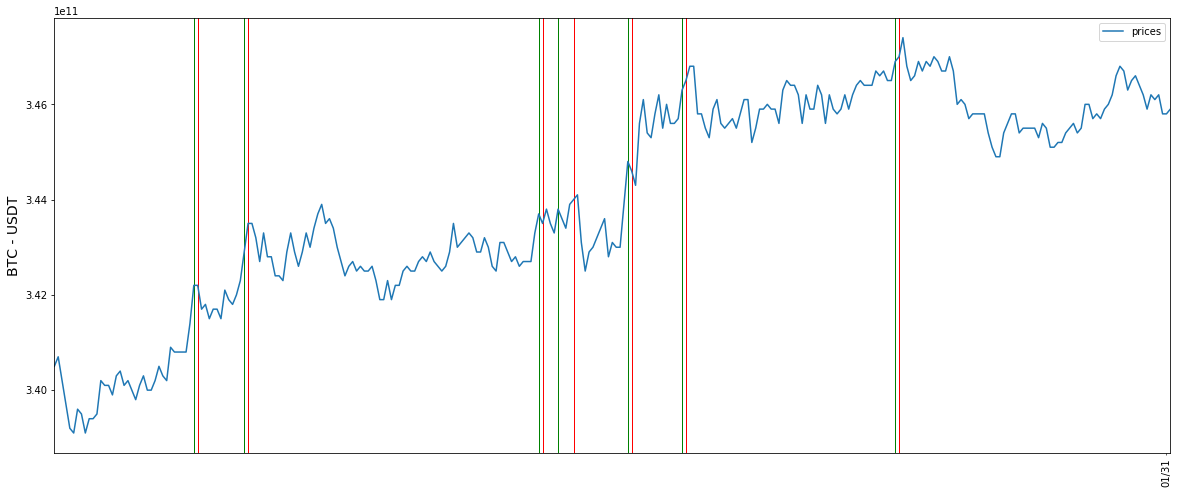

String representation:
if_then_else(xor(bbands_price_gt_up(ARG0), rsi_lt_30(ARG0)), if_then_else(rsi_gt_70(ARG0), sell, if_then_else(bbands_bearish_cross(ARG0), buy, sell)), ignore)



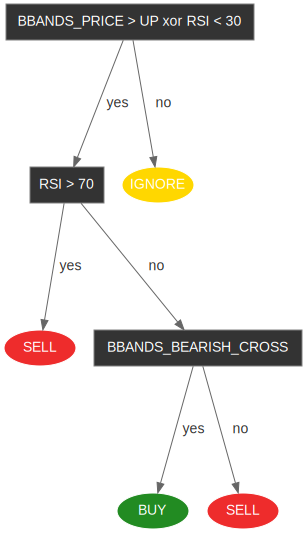

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

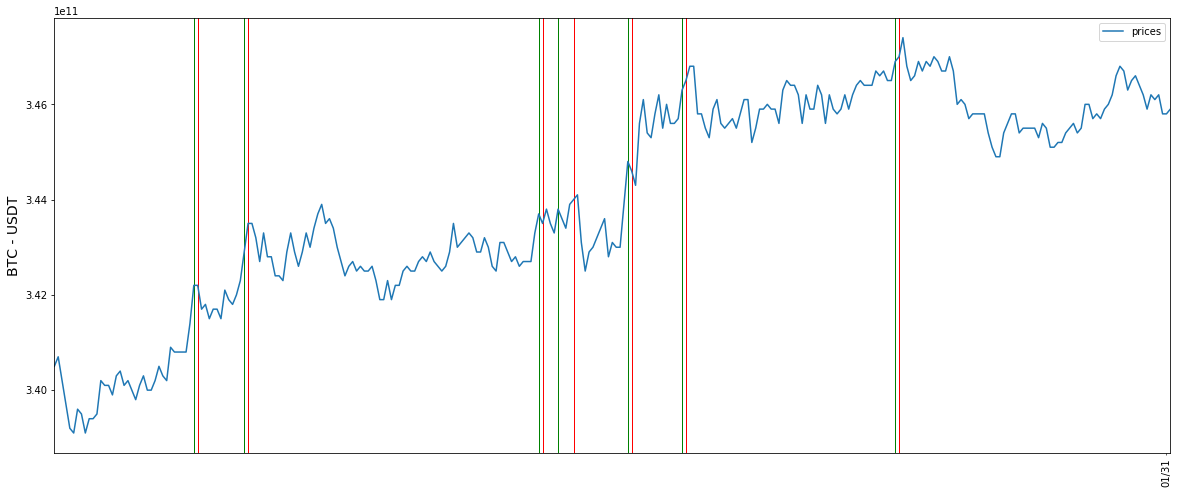

String representation:
if_then_else(rsi_gt_80(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))



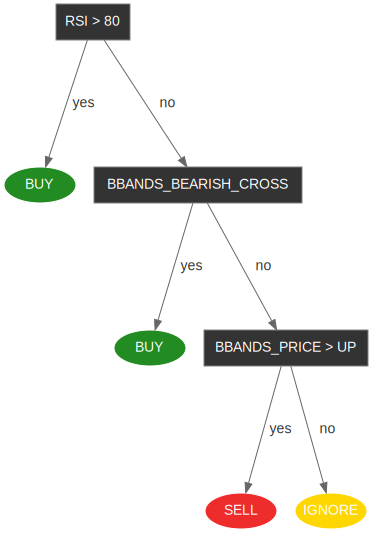

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

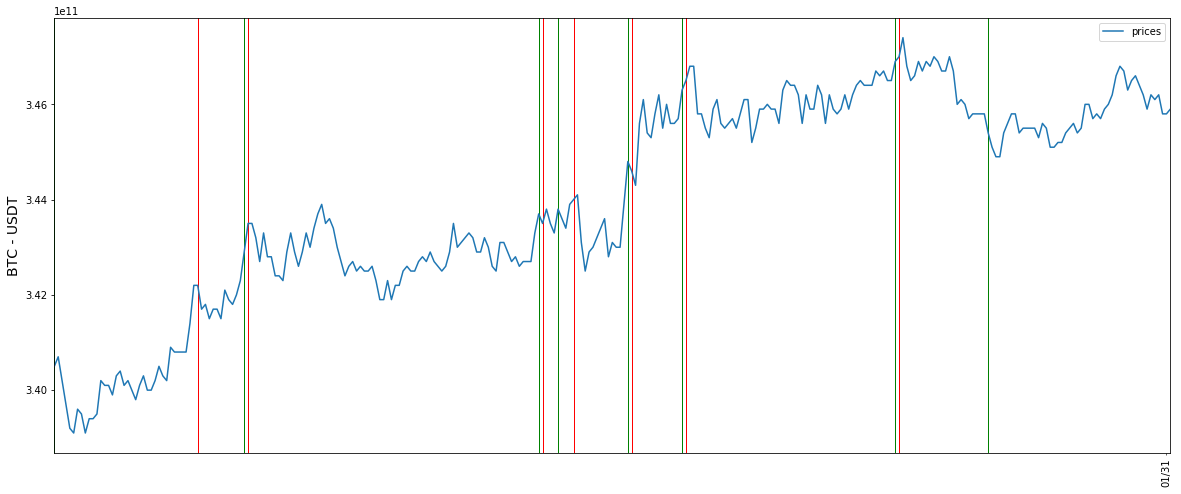

String representation:
if_then_else(bbands_bullish_cross(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(bbands_price_gt_up(ARG0), sell, ignore)))



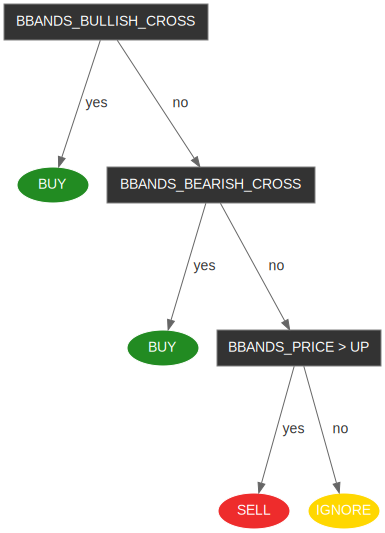

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1002.98 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 1002.9836775330397    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1002.98 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-

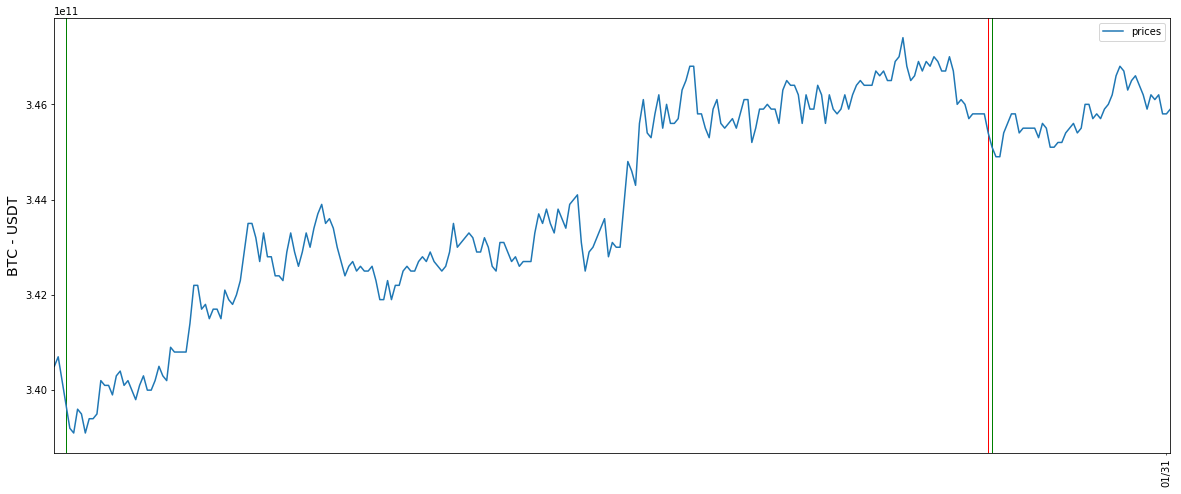

String representation:
if_then_else(bbands_bullish_cross(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(rsi_lt_25(ARG0), buy, sell), sell), if_then_else(rsi_gt_80(ARG0), if_then_else(bbands_bearish_cross(ARG0), ignore, sell), if_then_else(bbands_price_lt_low(ARG0), buy, ignore)))



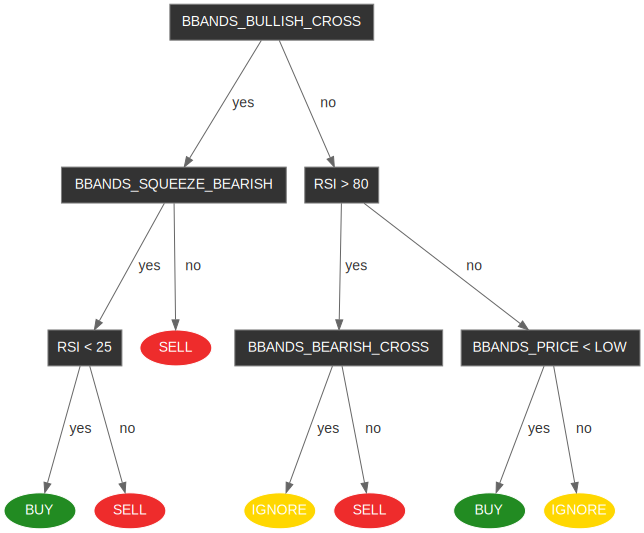

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:20:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.940830144244922e-09
2019/01/30 20:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1014.75 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345400000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 20:10:00 UTC rsi_value=None
   cash: 1014.7469690903739    crypto: 0.0
2019/01/30 20:15:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1014.75 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 345100000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-

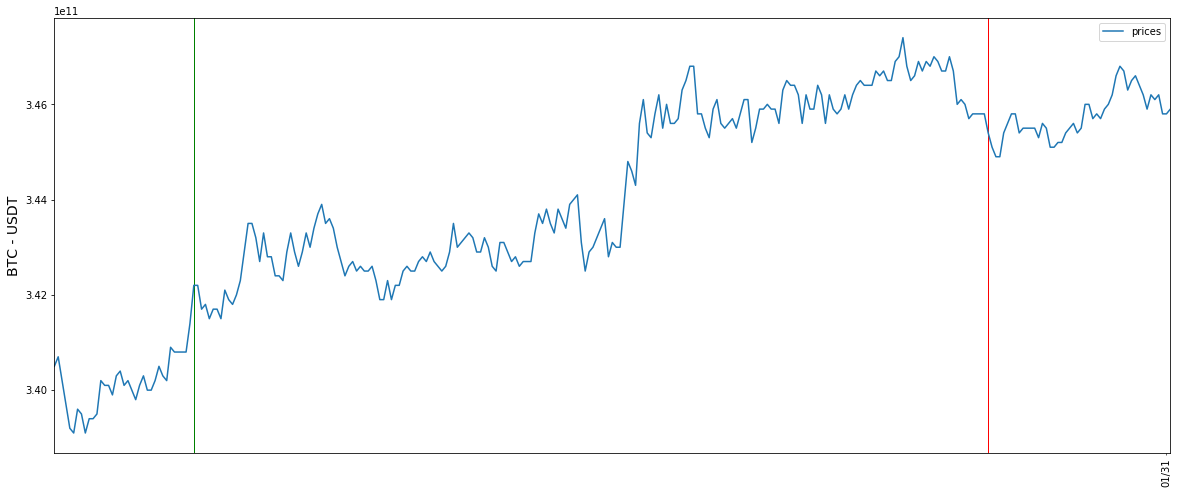

String representation:
if_then_else(gt(ema200(ARG0), 0), if_then_else(bbands_squeeze_bearish(ARG0), sell, if_then_else(bbands_price_gt_up(ARG0), buy, ignore)), ignore)



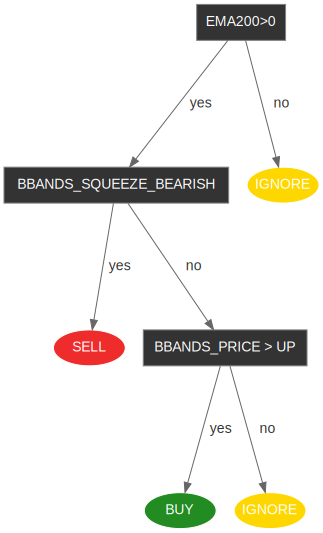

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 20:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1007.33 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345400000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 20:10:00 UTC rsi_value=None
   cash: 1007.3335634132087    crypto: 0.0
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 1007.33 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment

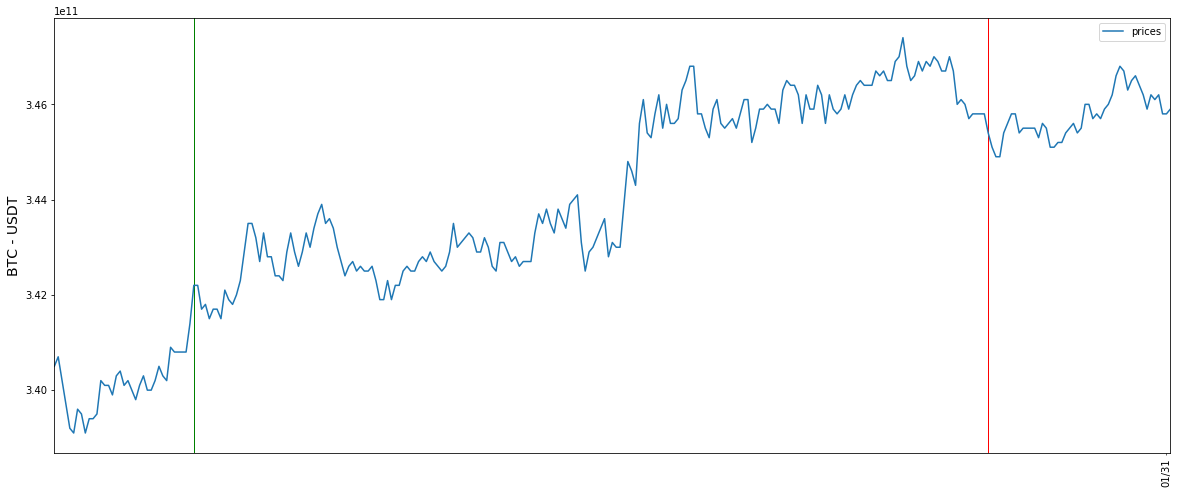

String representation:
if_then_else(bbands_bullish_cross(ARG0), sell, if_then_else(bbands_squeeze_bullish(ARG0), buy, ignore))



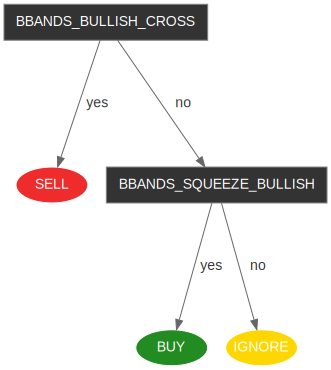

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 20:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1007.33 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345400000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 20:10:00 UTC rsi_value=None
   cash: 1007.3335634132087    crypto: 0.0
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 1007.33 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment

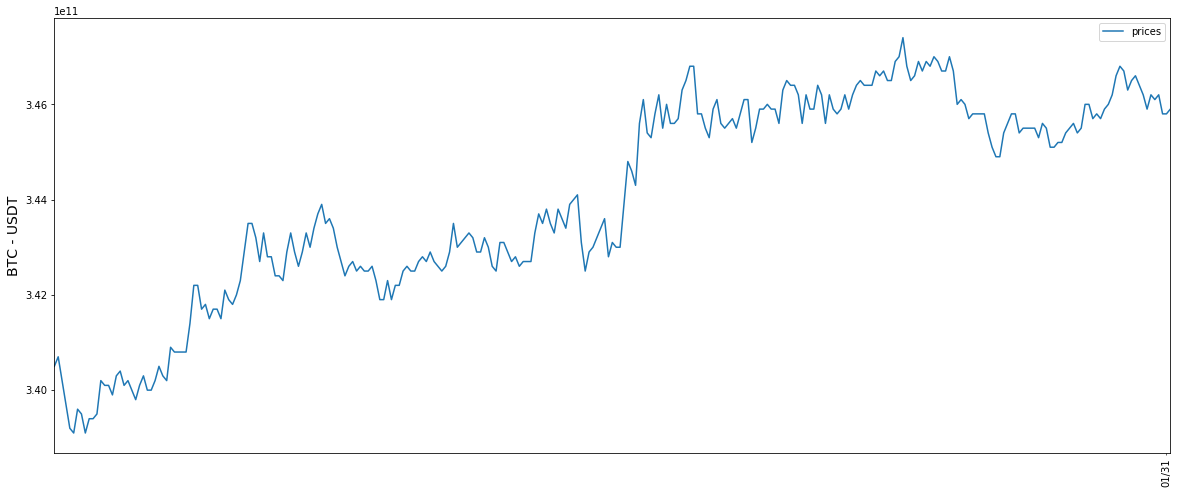

String representation:
if_then_else(lt(ema50(ARG0), ema200(ARG0)), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(bbands_bearish_cross(ARG0), ignore, buy), sell), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_70(ARG0), sell, ignore), buy))



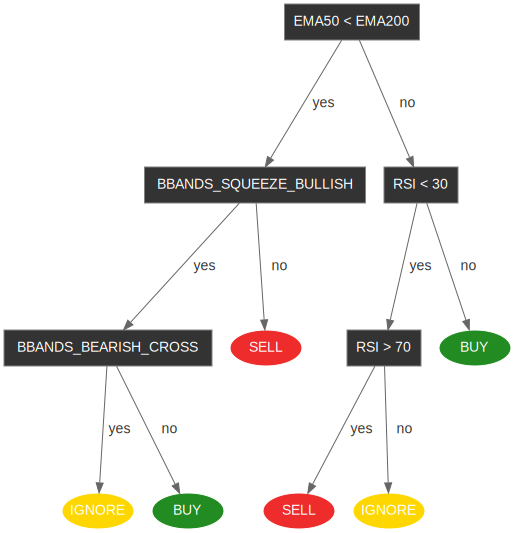

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 0
End cash: 1000.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1000.00 USDT (+0.00%)
Profit: 0.00 USDT

Additional stats:
  Max drawdown: 0.0
  Max drawdown duration: 0
  Sharpe ratio: nan
  Alpha: 0.0
  Beta: 0.0
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair returns - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Total buy-sell pairs: 0
  Total profitable trades: 0
  Percent profitable trades: nan
  Percent unprofitable trades: None

Benchmark backtesting report:
 Buy&hold, start_time=1548806700, end_time=1548893100, transaction_currency=BTC, count

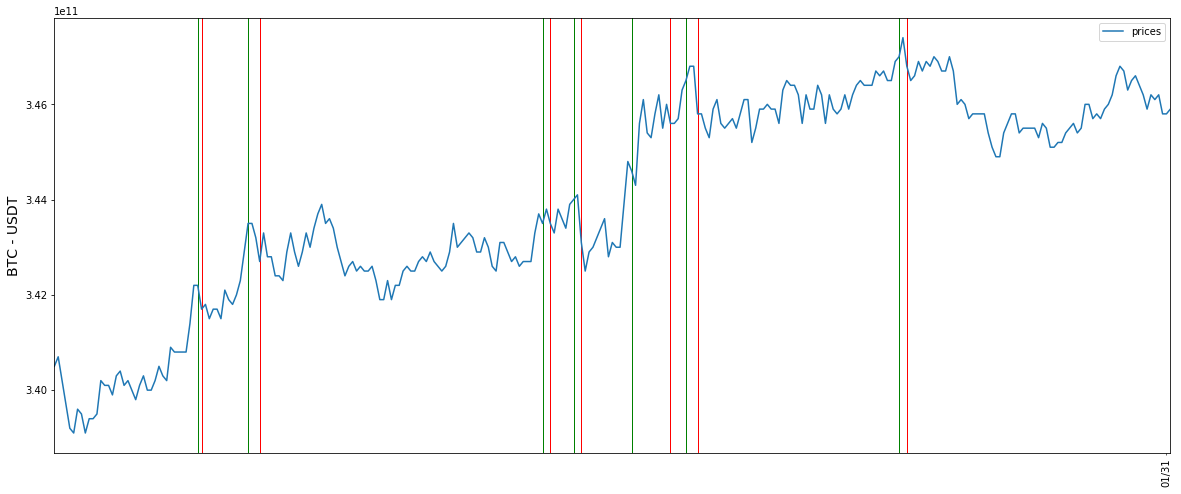

String representation:
if_then_else(bbands_bearish_cross(ARG0), ignore, if_then_else(bbands_price_gt_up(ARG0), buy, sell))



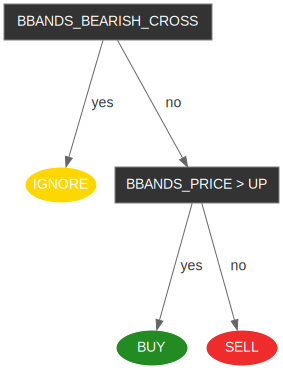

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:15:00 UTC  	 OrderType.SELL   	 delta_cash ->        996.54 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 341700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:15:00 UTC rsi_value=None
   cash: 996.5427869666861    crypto: 0.0
2019/01/30 04:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -996.54 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 343500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

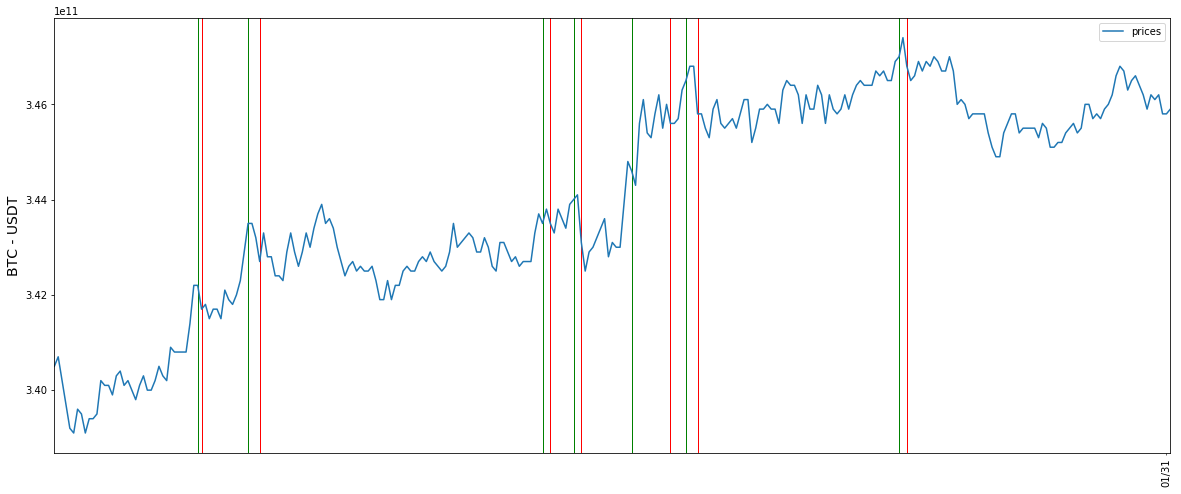

String representation:
if_then_else(lt(ema50(ARG0), ema200(ARG0)), if_then_else(xor(bbands_price_gt_up(ARG0), rsi_lt_30(ARG0)), if_then_else(bbands_bearish_cross(ARG0), ignore, buy), sell), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_70(ARG0), sell, ignore), buy))



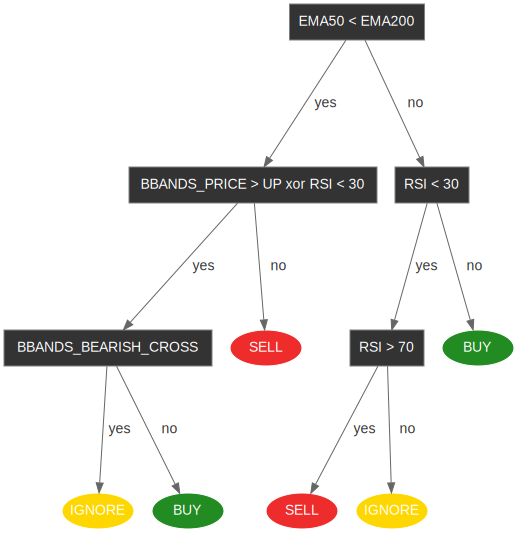

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:15:00 UTC  	 OrderType.SELL   	 delta_cash ->        996.54 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 341700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:15:00 UTC rsi_value=None
   cash: 996.5427869666861    crypto: 0.0
2019/01/30 04:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -996.54 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 343500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

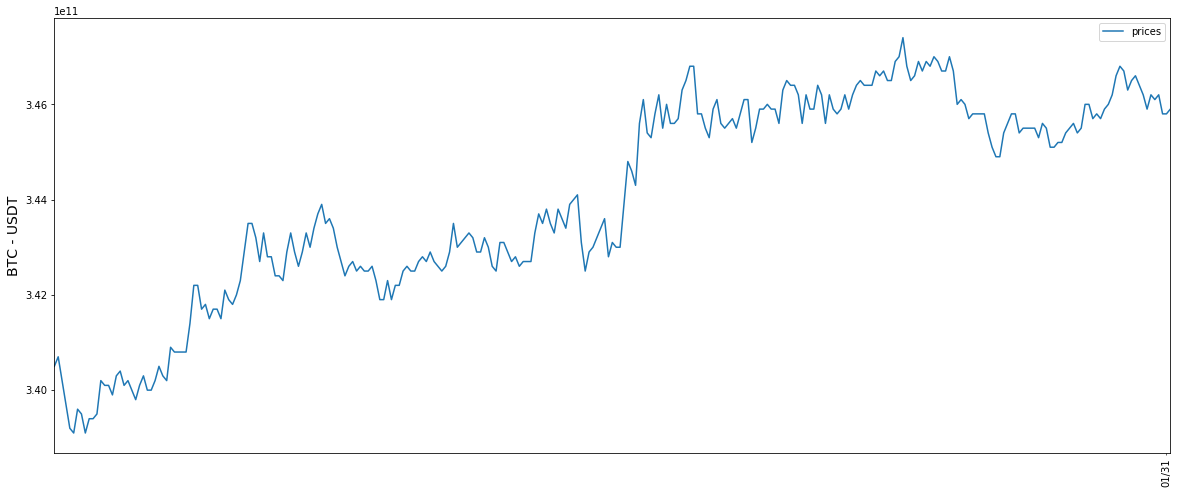

String representation:
if_then_else(lt(price(ARG0), sma200(ARG0)), if_then_else(rsi_lt_25(ARG0), buy, sell), buy)



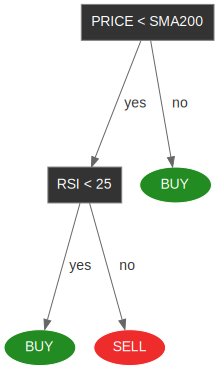

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 0
End cash: 1000.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1000.00 USDT (+0.00%)
Profit: 0.00 USDT

Additional stats:
  Max drawdown: 0.0
  Max drawdown duration: 0
  Sharpe ratio: nan
  Alpha: 0.0
  Beta: 0.0
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair returns - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Total buy-sell pairs: 0
  Total profitable trades: 0
  Percent profitable trades: nan
  Percent unprofitable trades: None

Benchmark backtesting report:
 Buy&hold, start_time=1548806700, end_time=1548893100, transaction_currency=BTC, count

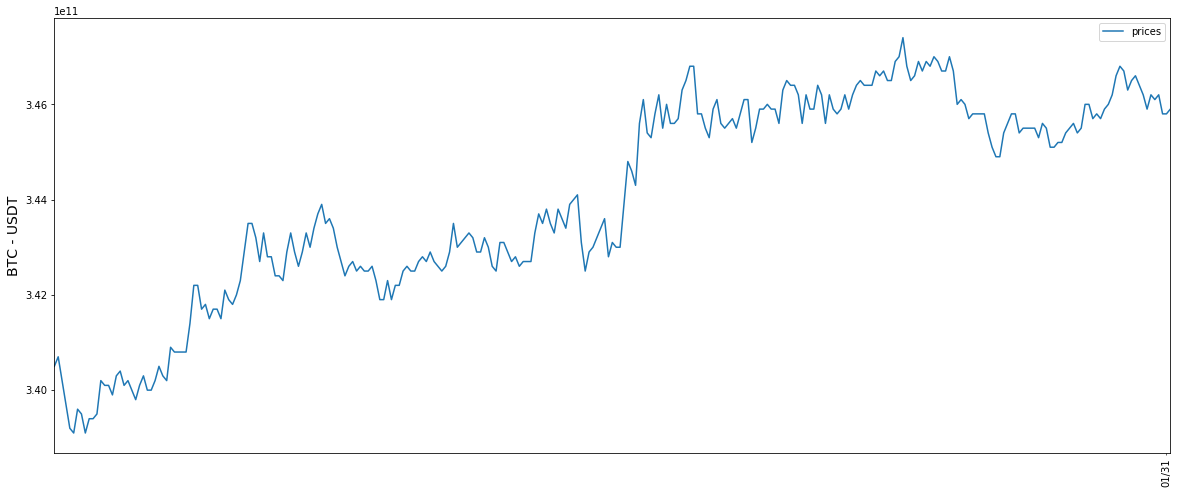

String representation:
if_then_else(lt(sma20(ARG0), sma200(ARG0)), if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_20(ARG0), buy, sell), sell), buy)



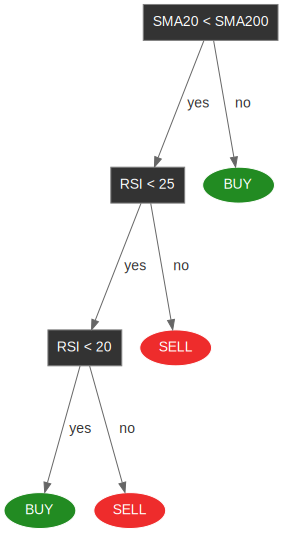

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 0
End cash: 1000.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1000.00 USDT (+0.00%)
Profit: 0.00 USDT

Additional stats:
  Max drawdown: 0.0
  Max drawdown duration: 0
  Sharpe ratio: nan
  Alpha: 0.0
  Beta: 0.0
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair returns - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Total buy-sell pairs: 0
  Total profitable trades: 0
  Percent profitable trades: nan
  Percent unprofitable trades: None

Benchmark backtesting report:
 Buy&hold, start_time=1548806700, end_time=1548893100, transaction_currency=BTC, count

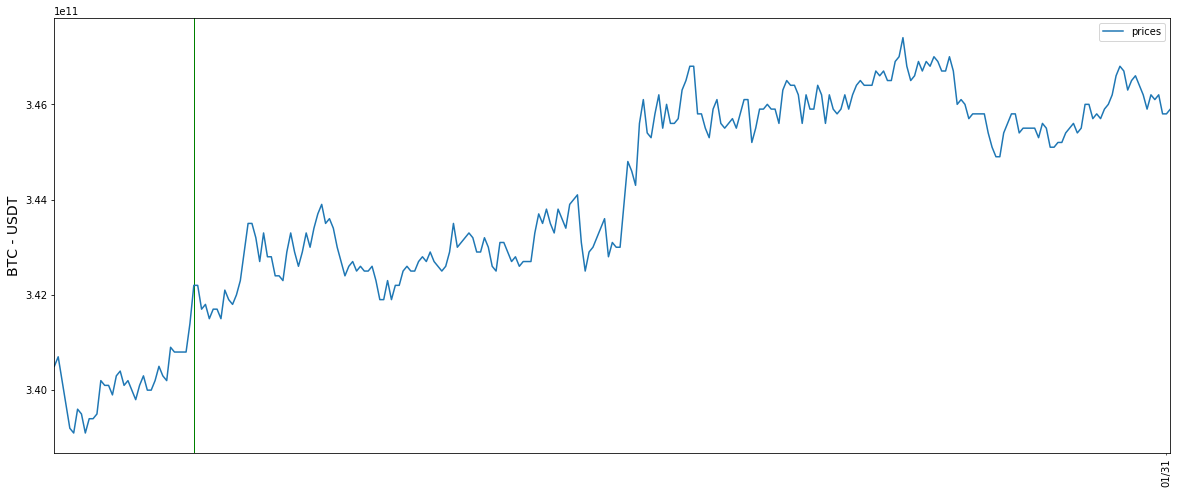

String representation:
if_then_else(bbands_bearish_cross(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, buy), ignore)



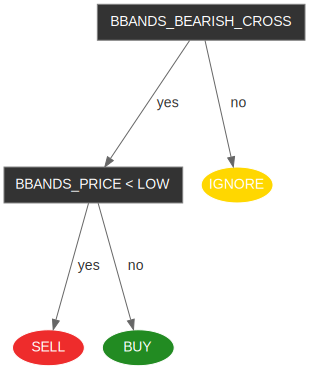

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0    crypto: 2.919345412039743e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1008.79 USDT (+0.88%)
Profit: 8.79 USDT

Additional stats:
  Max drawdown: -0.007196315486471594
  Max drawdown duration: 7200
  Sharpe ratio: 0.6026328345270556
  Alpha: -0.0025310640661624375
  Beta: 0.8577525493581893
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - 

ERROR:root:Unable to form decision for BTC_USDT at 1548882300: unsupported operand type(s) for *: 'float' and 'NoneType'


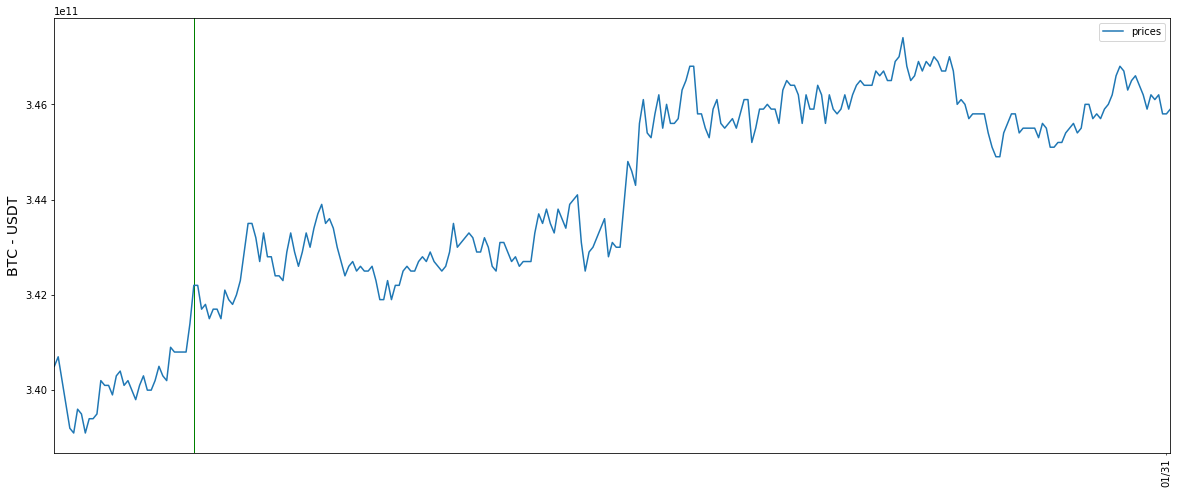

String representation:
if_then_else(bbands_bearish_cross(ARG0), if_then_else(bbands_bullish_cross(ARG0), if_then_else(bbands_squeeze_bullish(ARG0), ignore, buy), if_then_else(candlestick_momentum_buy(ARG0), buy, sell)), if_then_else(rsi_gt_80(ARG0), sell, ignore))



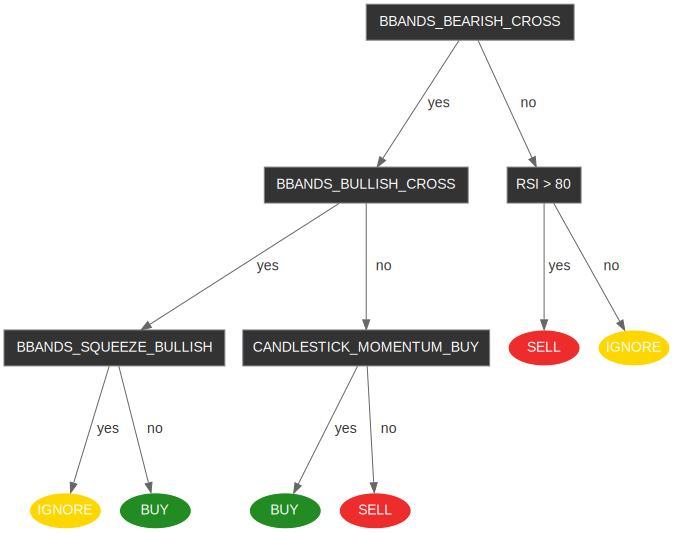

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0    crypto: 2.919345412039743e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1008.79 USDT (+0.88%)
Profit: 8.79 USDT

Additional stats:
  Max drawdown: -0.007196315486471594
  Max drawdown duration: 7200
  Sharpe ratio: 0.6026328345270556
  Alpha: -0.0025310640661624375
  Beta: 0.8577525493581893
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - 

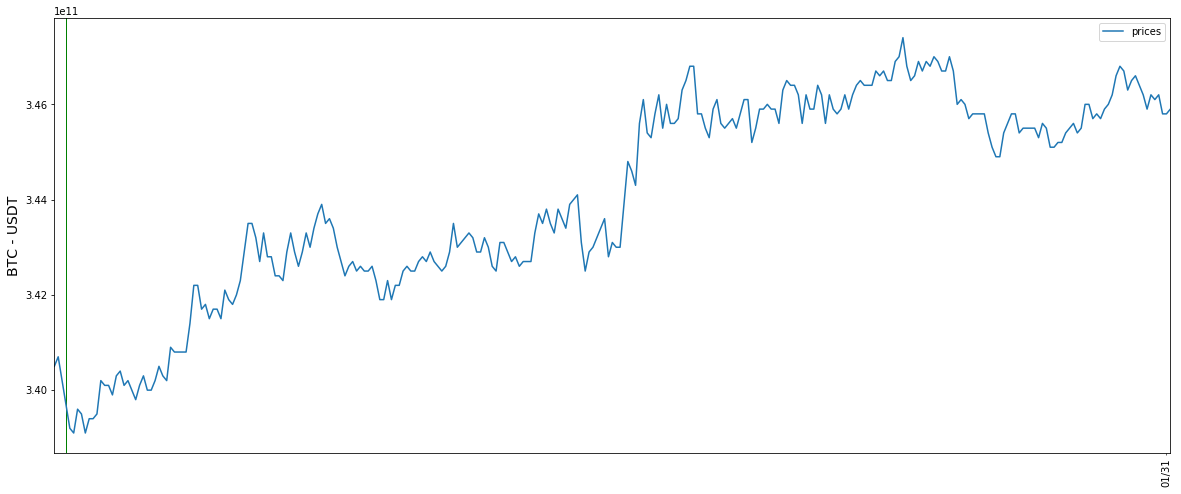

String representation:
if_then_else(and_(xor(candlestick_momentum_sell(ARG0), bbands_price_lt_low(ARG0)), rsi_lt_30(ARG0)), if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, ignore), ignore), if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), ignore))



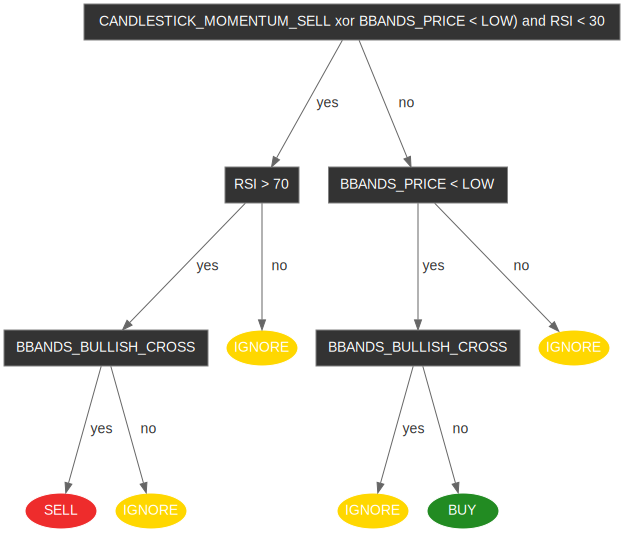

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:20:00 UTC rsi_value=None
   cash: 0    crypto: 2.940830144244922e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1016.22 USDT (+1.62%)
Profit: 16.22 USDT

Additional stats:
  Max drawdown: -0.007196315486471039
  Max drawdown duration: 7200
  Sharpe ratio: 0.9895767441477739
  Alpha: 0.002258612642545239
  Beta: 0.9850629248801045
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - o

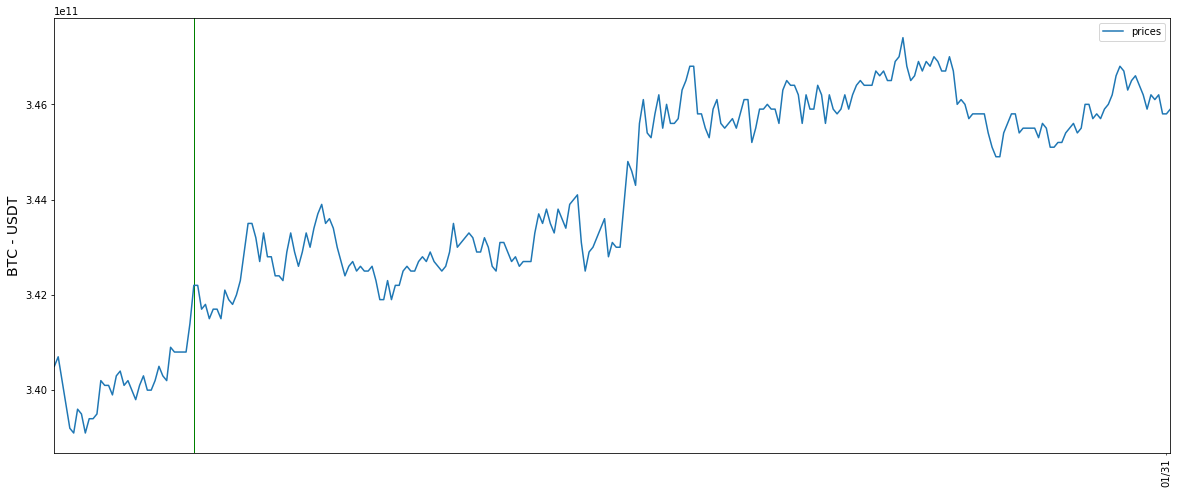

String representation:
if_then_else(bbands_price_gt_up(ARG0), buy, ignore)



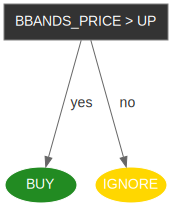

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0    crypto: 2.919345412039743e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1008.79 USDT (+0.88%)
Profit: 8.79 USDT

Additional stats:
  Max drawdown: -0.007196315486471594
  Max drawdown duration: 7200
  Sharpe ratio: 0.6026328345270556
  Alpha: -0.0025310640661624375
  Beta: 0.8577525493581893
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - 

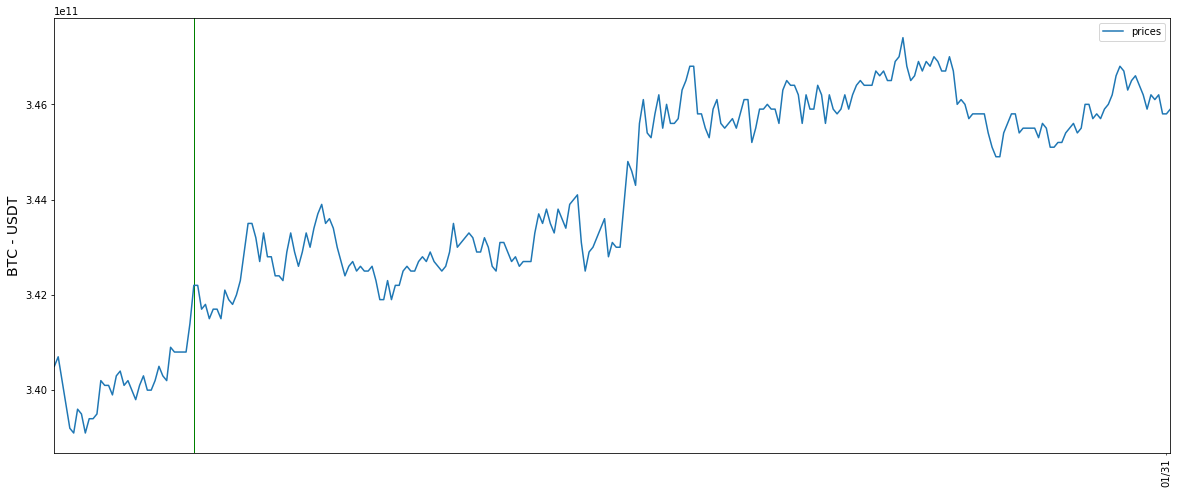

String representation:
if_then_else(bbands_bearish_cross(ARG0), buy, ignore)



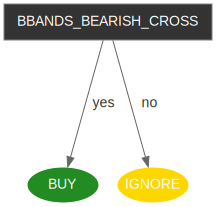

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0    crypto: 2.919345412039743e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1008.79 USDT (+0.88%)
Profit: 8.79 USDT

Additional stats:
  Max drawdown: -0.007196315486471594
  Max drawdown duration: 7200
  Sharpe ratio: 0.6026328345270556
  Alpha: -0.0025310640661624375
  Beta: 0.8577525493581893
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - 

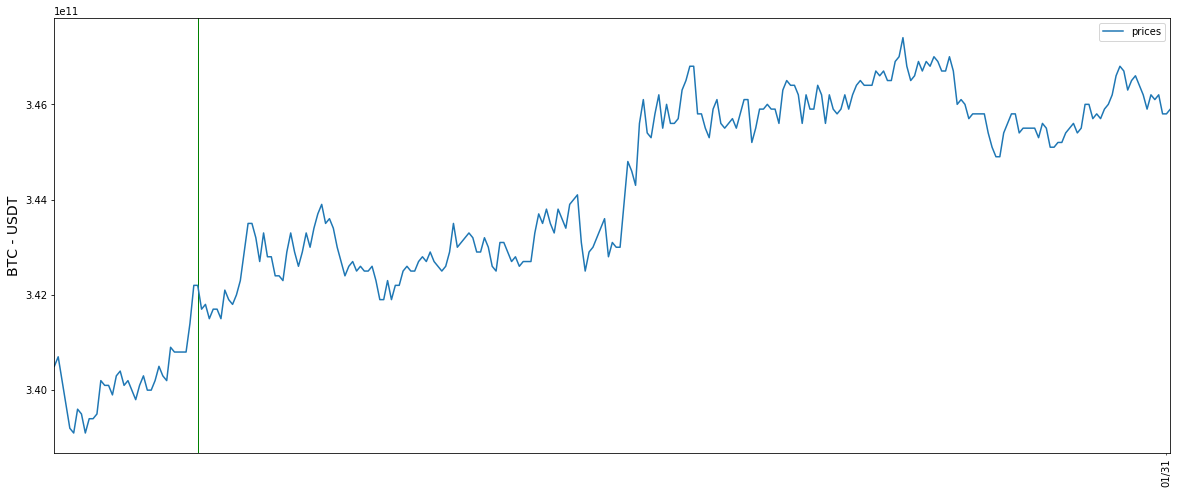

String representation:
if_then_else(bbands_price_gt_up(ARG0), if_then_else(bbands_bearish_cross(ARG0), ignore, buy), ignore)



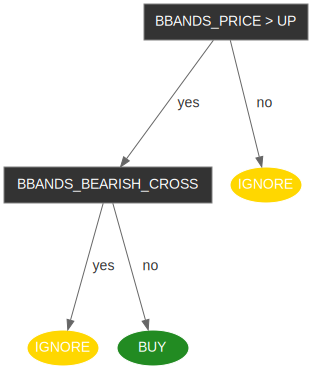

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 0    crypto: 2.919345412039743e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1008.79 USDT (+0.88%)
Profit: 8.79 USDT

Additional stats:
  Max drawdown: -0.007196315486471594
  Max drawdown duration: 7200
  Sharpe ratio: 0.6026328345270556
  Alpha: -0.002644678141486696
  Beta: 0.8664547506111924
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - o

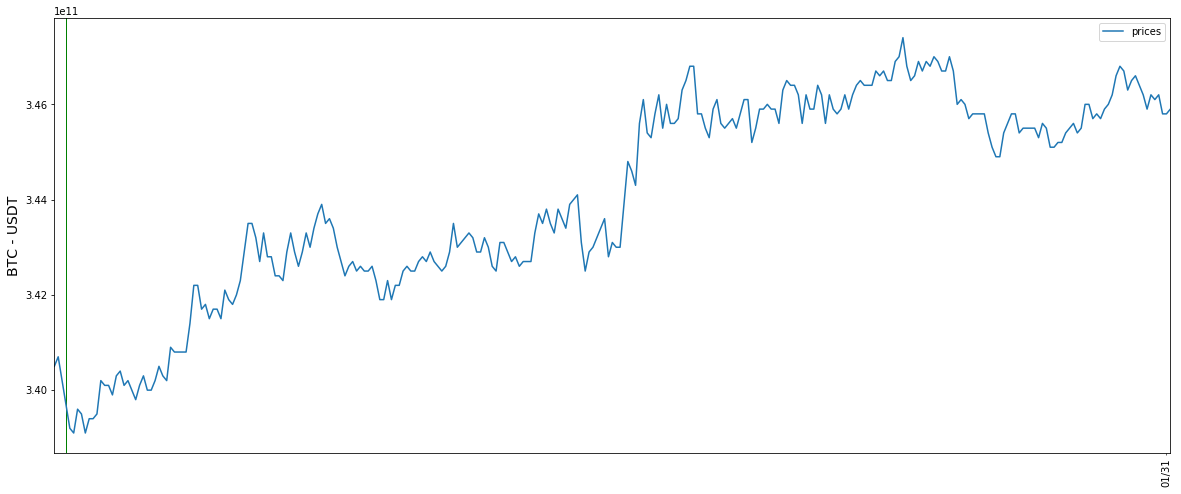

String representation:
if_then_else(rsi_lt_30(ARG0), buy, if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(rsi_gt_80(ARG0), buy, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, ignore)))



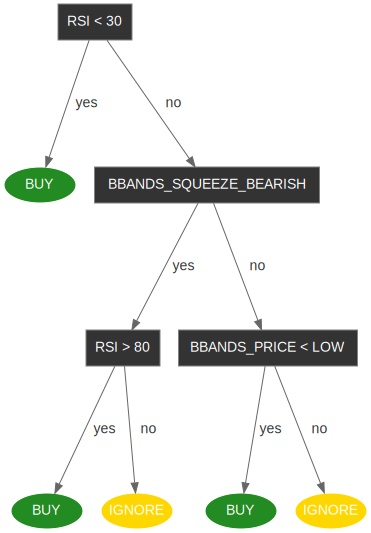

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:20:00 UTC rsi_value=None
   cash: 0    crypto: 2.940830144244922e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1016.22 USDT (+1.62%)
Profit: 16.22 USDT

Additional stats:
  Max drawdown: -0.007196315486471039
  Max drawdown duration: 7200
  Sharpe ratio: 0.9895767441477739
  Alpha: 0.002258612642545239
  Beta: 0.9850629248801045
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - o

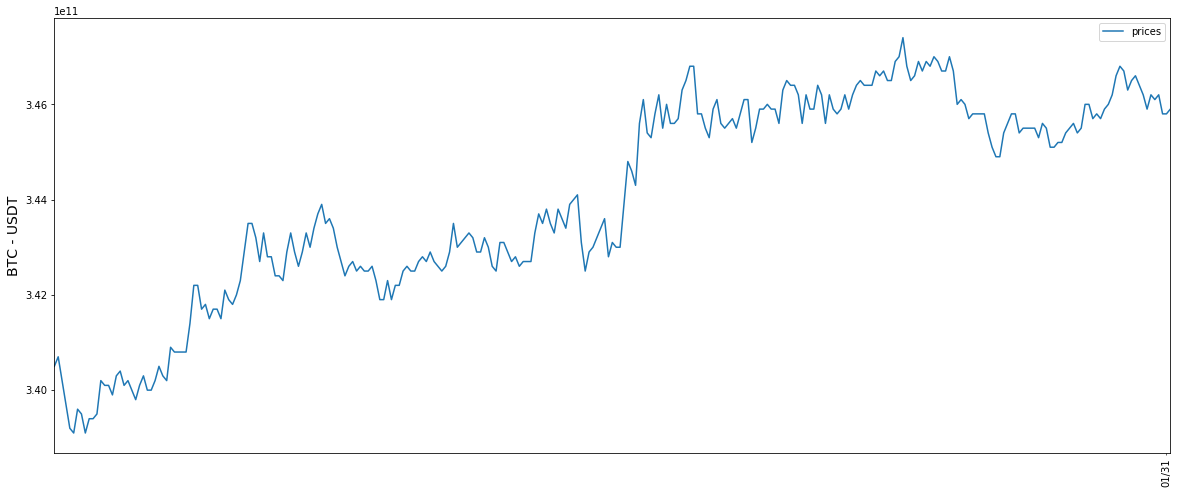

String representation:
if_then_else(lt(price(ARG0), sma200(ARG0)), if_then_else(rsi_lt_25(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, sell), if_then_else(bbands_bullish_cross(ARG0), sell, ignore)), if_then_else(rsi_gt_80(ARG0), if_then_else(rsi_lt_20(ARG0), ignore, sell), buy))



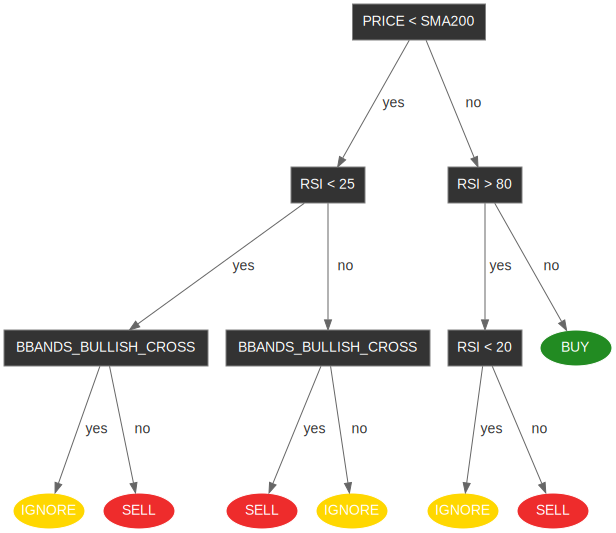

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 0
End cash: 1000.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1000.00 USDT (+0.00%)
Profit: 0.00 USDT

Additional stats:
  Max drawdown: 0.0
  Max drawdown duration: 0
  Sharpe ratio: nan
  Alpha: 0.0
  Beta: 0.0
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair returns - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Total buy-sell pairs: 0
  Total profitable trades: 0
  Percent profitable trades: nan
  Percent unprofitable trades: None

Benchmark backtesting report:
 Buy&hold, start_time=1548806700, end_time=1548893100, transaction_currency=BTC, count

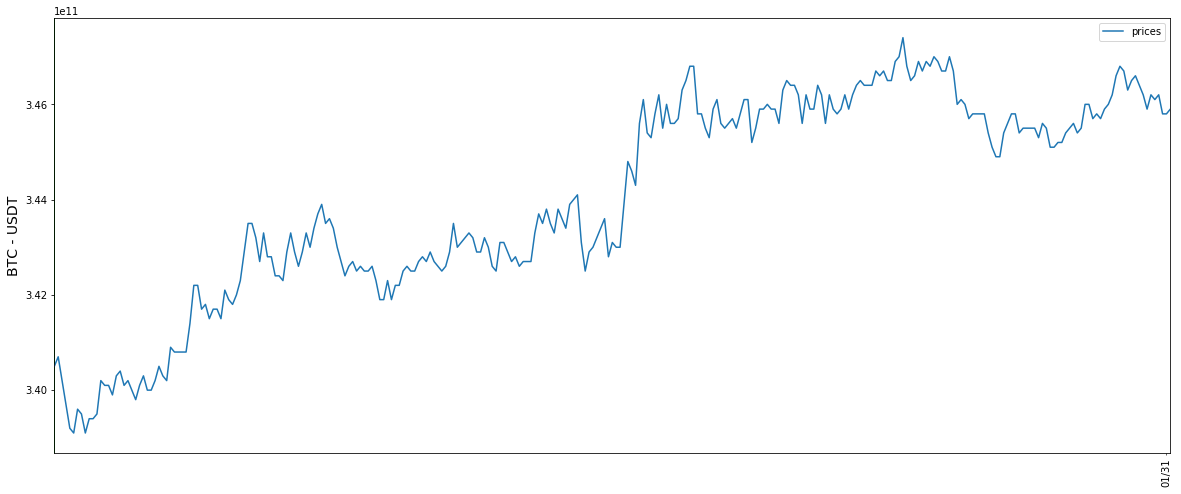

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(bbands_price_gt_up(ARG0), sell, buy), ignore)



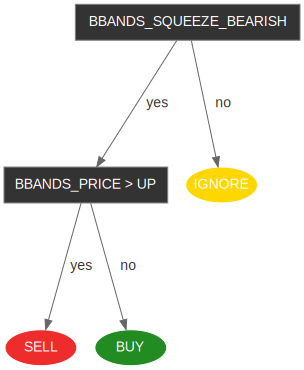

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0    crypto: 2.933920704845815e-09
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1013.83 USDT (+1.38%)
Profit: 13.83 USDT

Additional stats:
  Max drawdown: -0.007196315486471039
  Max drawdown duration: 7200
  Sharpe ratio: 0.9055027837842623
  Alpha: 0.0009153031021082873
  Beta: 0.9971659765131939
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - 

In [11]:
# Build the validation set
from apps.backtesting.data_sources import Data, DB_INTERFACE
validation_start = DB_INTERFACE.get_nearest_db_timestamp(end_timestamp, 'BTC_USDT')
validation_end = DB_INTERFACE.get_nearest_db_timestamp(end_timestamp+60*60*24, 'BTC_USDT')
from apps.backtesting.data_sources import Data, DB_INTERFACE
validation = DB_INTERFACE.build_data_object(
    start_time=validation_start,
    end_time=validation_end,
    ticker='BTC_USDT',
)

for i, row in filtered.iterrows():
    evaluation = e._build_evaluation_object(row.individual, row.variant, validation)
    e._print_individual_info(row.individual, evaluation)

In [ ]:
doge = DogeDNACanvas(best_overall.individual,"container")
HTML(doge.create_container())

In [ ]:
Javascript(doge.show())